In [1]:
#for installing vader 
#!pip install vaderSentiment

In [2]:
import numpy as np
import pandas as pd
import nltk
from matplotlib import pyplot as plt

In [3]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/slow/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [5]:
sentiment = SentimentIntensityAnalyzer()

In [6]:
sentiment.polarity_scores('Hello!')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [7]:
def sent(string):
    senti = sentiment.polarity_scores(string)
    score = senti['compound']
    if  score >= 0.05 :
        return "Positive"
 
    elif score <= - 0.05 :
        return "Negative"
 
    else :
        return "Neutral"

In [8]:
df_one = pd.read_csv('amazon_alexa.tsv',sep='\t')
df_one

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [9]:
df_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [10]:
df_one.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [11]:
df_one.groupby(["variation"])['verified_reviews'].count()

variation
Black                           261
Black  Dot                      516
Black  Plus                     270
Black  Show                     265
Black  Spot                     241
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Heather Gray Fabric             157
Oak Finish                       14
Sandstone Fabric                 90
Walnut Finish                     9
White                            91
White  Dot                      184
White  Plus                      78
White  Show                      85
White  Spot                     109
Name: verified_reviews, dtype: int64

In [12]:
sentiment_series = pd.Series([sent(review) for review in df_one['verified_reviews']],index=[x for x in np.arange(len(df_one.index))])
sentiment_series

0       Positive
1       Positive
2       Negative
3       Positive
4        Neutral
          ...   
3145    Positive
3146     Neutral
3147    Positive
3148     Neutral
3149    Positive
Length: 3150, dtype: object

In [81]:
df_two = df_one.copy()
df_two['reviews sentiment'] = sentiment_series
df_two

,rating,date,variation,verified_reviews,feedback,reviews sentiment
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Positive
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Positive
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Negative
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,Positive
4,5,31-Jul-18,Charcoal Fabric,Music,1,Neutral
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,Positive
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,Neutral
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,Positive
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,Neutral


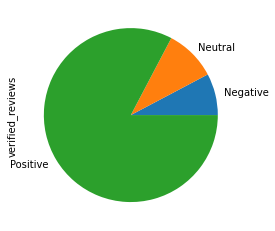

In [94]:
df_two.groupby('reviews sentiment')['verified_reviews'].nunique().plot(kind='pie')
plt.show()